In [1585]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Time
import time
import math

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

In [1586]:
# Prandtl-Meyer function:
def prandtlmeyer(M,gamma=1.4):
    return np.sqrt((gamma+1)/(gamma-1))*np.arctan(np.sqrt(((gamma-1)/(gamma+1))*((M**2)-1)))-np.arctan(np.sqrt((M**2)-1))

In [1587]:
# d/dM:
def derprandtlmeyer(M,gamma=1.4):
    return (((gamma-1)*np.sqrt((gamma+1)/(gamma-1))*M)/((gamma+1)*((((gamma-1)*((M**2)-1))/(gamma+1))+1)*np.sqrt(((gamma-1)*((M**2)-1))/(gamma+1))))-(1/(M*np.sqrt((M**2)-1)))

In [1588]:
# d^2/dM^2:
def der2prandtlmeyer(M,gamma=1.4):
    return (((gamma-1)*np.sqrt((gamma+1)/(gamma-1)))/((gamma+1)*((((gamma-1)*((M**2)-1))/(gamma+1))+1)*np.sqrt(((gamma-1)*((M**2)-1))/(gamma+1))))-((2*((gamma-1)**2)*np.sqrt((gamma+1)/(gamma-1))*(M**2))/(((gamma+1)**2)*(((((gamma-1)*((M**2)-1))/(gamma+1))+1)**2)*np.sqrt(((gamma-1)*((M**2)-1))/(gamma+1))))-((((gamma-1)**2)*np.sqrt((gamma+1)/(gamma-1))*(M**2))/(((gamma+1)**2)*(((((gamma-1)*((M**2)-1))/(gamma+1))+1)**2)*((((gamma-1)*((M**2)-1))/(gamma+1))**(3/2))))+(1/((M**2)*np.sqrt((M**2)-1)))+(1/(((M**2)-1)**(3/2)))
    

In [1589]:
gamma =1.4
Mvals = np.arange(11,50,1)
normal = np.zeros(len(Mvals))
dM = np.zeros(len(Mvals))
ddM = np.zeros(len(Mvals))

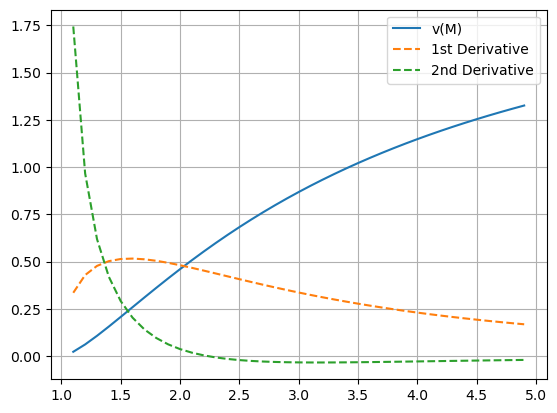

In [1590]:
it = 0
for i in Mvals:
    normal[it] = prandtlmeyer(i/10)
    dM[it] = derprandtlmeyer(i/10)
    ddM[it] = der2prandtlmeyer(i/10)
    it += 1
plt.plot(Mvals/10,normal,'-',Mvals/10,dM,'--',Mvals/10,ddM,'--')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['v(M)','1st Derivative','2nd Derivative'])
plt.grid()
plt.show()

In [1591]:
def centraldifference(f,x,h=1e-6):
    return (f(x + h)-f(x - h))/(2 * h)
def centraldifference2(f,x,h=1e-6):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [1592]:
def forwarddifference(f,x,h=1e-5):
    return (f(x+h)-f(x))/h
def forwarddifference2(f,x,h=1e-5):
    return (f(x+2*h)-2*f(x+h)+f(x))/(h**2)

In [1593]:
def forwarddifferencesecond(f,x,h=1e-5):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def forwarddifferencesecond2(f,x,h=1e-5):
    return (f(x)-2*f(x+h)+f(x+2*h))/(h**2)

In [1594]:
cdiffs = np.zeros(len(Mvals))
cdiffs2 = np.zeros(len(Mvals))
fdiffs = np.zeros(len(Mvals))
fdiffs2 = np.zeros(len(Mvals))
f2diffs = np.zeros(len(Mvals))
f2diffs2 = np.zeros(len(Mvals))
j = 0
for i in Mvals:
    cdiffs[j] = centraldifference(prandtlmeyer,i/10)
    cdiffs2[j] = centraldifference2(prandtlmeyer,i/10)
    fdiffs[j] = forwarddifference(prandtlmeyer,i/10)
    fdiffs2[j] = forwarddifference2(prandtlmeyer,i/10)
    f2diffs[j] = forwarddifferencesecond(prandtlmeyer,i/10)
    f2diffs2[j] = forwarddifferencesecond2(prandtlmeyer,i/10)
    j += 1

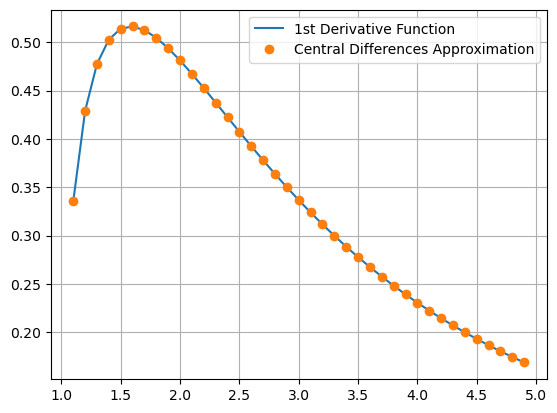

In [1595]:
plt.plot(Mvals/10,dM,'-',Mvals/10,cdiffs,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['1st Derivative Function','Central Differences Approximation'])
plt.grid()
plt.show()

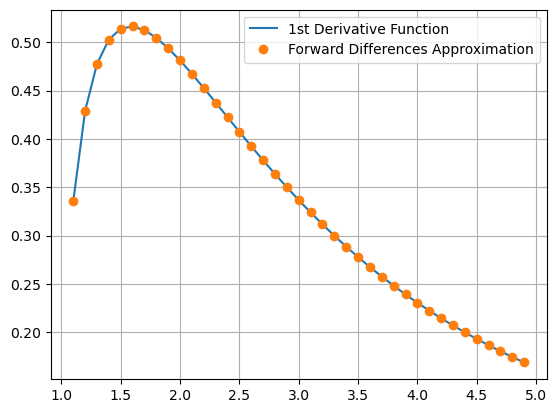

In [1596]:
plt.plot(Mvals/10,dM,'-',Mvals/10,fdiffs,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['1st Derivative Function','Forward Differences Approximation'])
plt.grid()
plt.show()

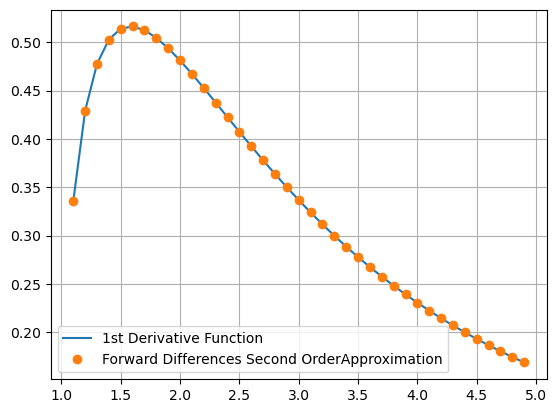

In [1597]:
plt.plot(Mvals/10,dM,'-',Mvals/10,f2diffs,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['1st Derivative Function','Forward Differences Second OrderApproximation'])
plt.grid()
plt.show()

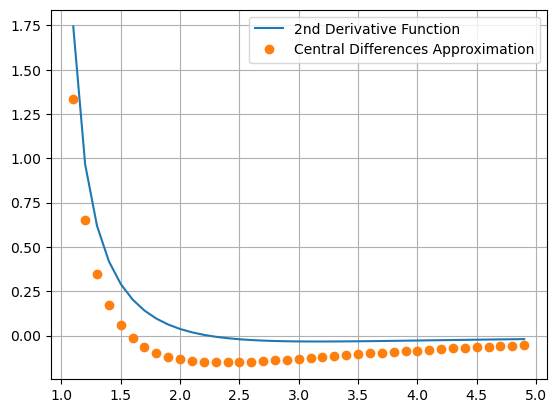

In [1598]:
plt.plot(Mvals/10,ddM,'-',Mvals/10,cdiffs2,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['2nd Derivative Function','Central Differences Approximation'])
plt.grid()
plt.show()

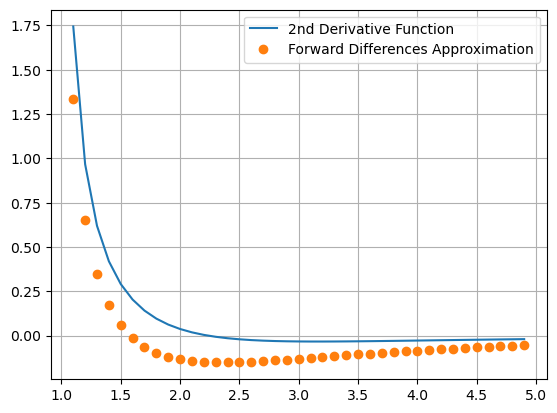

In [1599]:
plt.plot(Mvals/10,ddM,'-',Mvals/10,fdiffs2,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['2nd Derivative Function','Forward Differences Approximation'])
plt.grid()
plt.show()

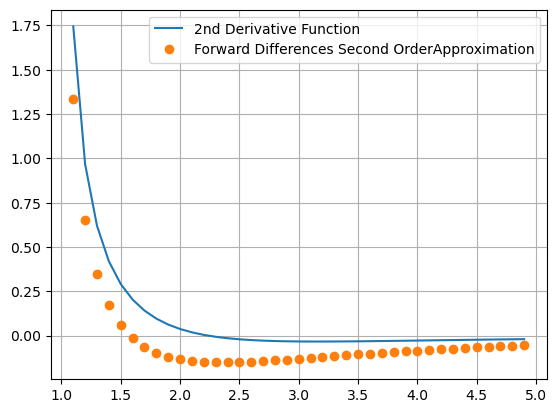

In [1600]:
plt.plot(Mvals/10,ddM,'-',Mvals/10,f2diffs2,'o')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(['2nd Derivative Function','Forward Differences Second OrderApproximation'])
plt.grid()
plt.show()

In [1601]:
def cd(f,x,h):
    return (f(x + h)-f(x - h))/(2 * h)
def cd2(f,x,h):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [1602]:
def fd(f,x,h):
    return (f(x+h)-f(x))/h
def fd2(f,x,h):
    return (f(x+2*h)-2*f(x+h)+f(x))/(h**2)

In [1603]:
def fdsecond(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def fdsecond2(f,x,h):
    return (f(x)-2*f(x+h)+f(x+2*h))/(h**2)

In [1604]:
deltaM = .1
i = 0
deci = 2
run = 17
errvals = np.zeros((len(Mvals),6,run))
while deltaM >= 10**(-run):
    j = 0
    for k in Mvals:
        errvals[j,0,i] = dM[j] - cd(prandtlmeyer,k/10,deltaM)
        errvals[j,1,i] = ddM[j] - cd2(prandtlmeyer,k/10,deltaM)
        errvals[j,2,i] = dM[j] - fd(prandtlmeyer,k/10,deltaM)
        errvals[j,3,i] = ddM[j] - fd2(prandtlmeyer,k/10,deltaM)
        errvals[j,4,i] = dM[j] - fdsecond(prandtlmeyer,k/10,deltaM)
        errvals[j,5,i] = ddM[j] - fdsecond2(prandtlmeyer,k/10,deltaM)
        j += 1
    deltaM = np.round(deltaM/10,decimals = deci)
    deci += 1
    i += 1

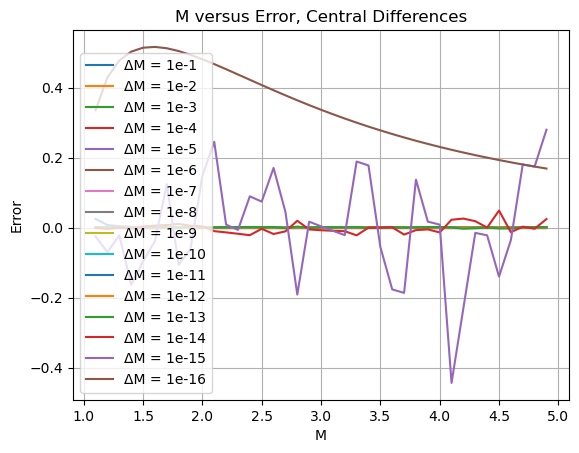

In [1605]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,0,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, Central Differences')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

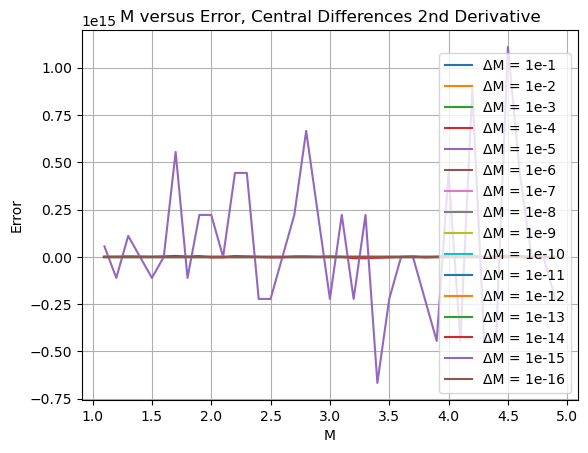

In [1606]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,1,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, Central Differences 2nd Derivative')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

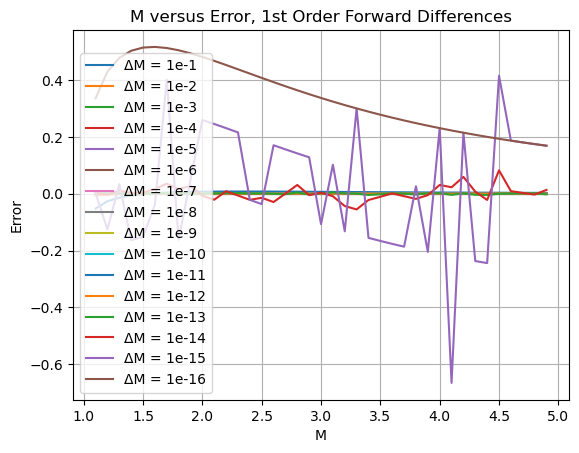

In [1607]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,2,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, 1st Order Forward Differences')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

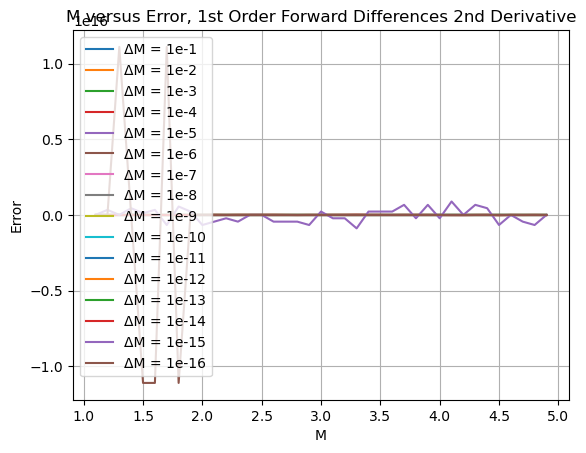

In [1608]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,3,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, 1st Order Forward Differences 2nd Derivative')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

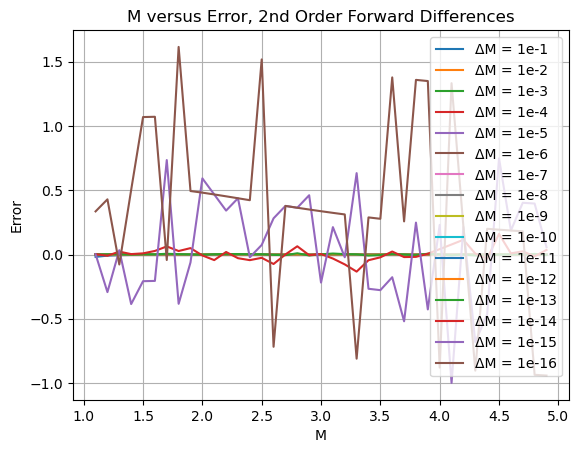

In [1609]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,4,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, 2nd Order Forward Differences')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

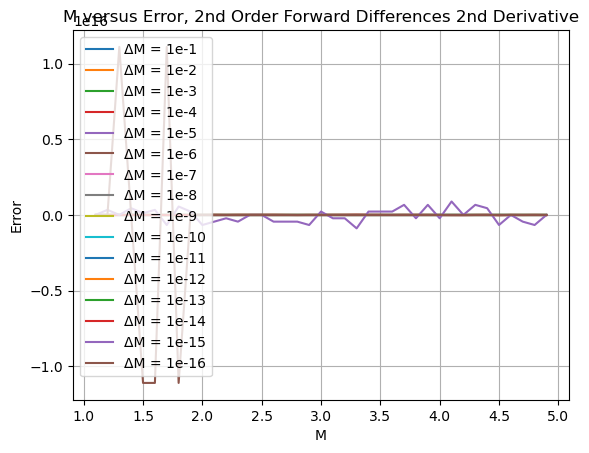

In [1610]:
names = np.array([])
for i in range(0,run-1):
    plt.plot(Mvals/10,errvals[:,5,i],'-')
    names = np.append(names,"ΔM = 1e-"+str(i+1))
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M versus Error, 2nd Order Forward Differences 2nd Derivative')
plt.legend(names)
plt.grid()
plt.show()
plt.show()

In [1611]:
M18 = prandtlmeyer(1.8)
dM18 = derprandtlmeyer(1.8)
ddM18 = der2prandtlmeyer(1.8)

In [1612]:
deltaM = .1
i = 0
deci = 2
run = 17
cd18 = np.zeros(run)
f118 = np.zeros(run)
f218 = np.zeros(run)
while deltaM >= 10**(-run):
    cd18[i] = dM18 - cd(prandtlmeyer,1.8,deltaM)
    f118[i] = dM18 - fd(prandtlmeyer,1.8,deltaM)
    f218[i] = dM18 - fdsecond(prandtlmeyer,1.8,deltaM)
    deltaM = np.round(deltaM/10,decimals = deci)
    deci += 1
    i += 1

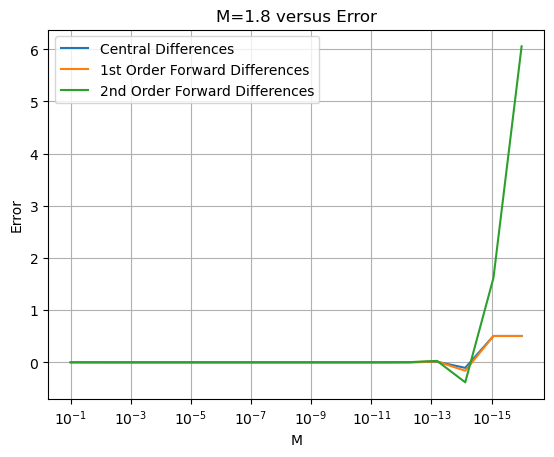

In [1613]:
deltaMvals = np.logspace(-1,-16,num=17)
names = np.array([])
plt.plot(deltaMvals,cd18,'-')
plt.plot(deltaMvals,f118,'-')
plt.plot(deltaMvals,f218,'-')
plt.gca().invert_xaxis()
plt.xscale("log")
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M=1.8 versus Error')
plt.legend(['Central Differences','1st Order Forward Differences','2nd Order Forward Differences'])
plt.grid()
plt.show()

In [1614]:
deltaM = .1
i = 0
deci = 2
run = 17
cd182 = np.zeros(run)
f1182 = np.zeros(run)
f2182 = np.zeros(run)
while deltaM >= 10**(-run):
    cd182[i] = ddM18 - cd2(prandtlmeyer,1.8,deltaM)
    f1182[i] = ddM18 - fd2(prandtlmeyer,1.8,deltaM)
    f2182[i] = ddM18 - fdsecond2(prandtlmeyer,1.8,deltaM)
    deltaM = np.round(deltaM/10,decimals = deci)
    deci += 1
    i += 1

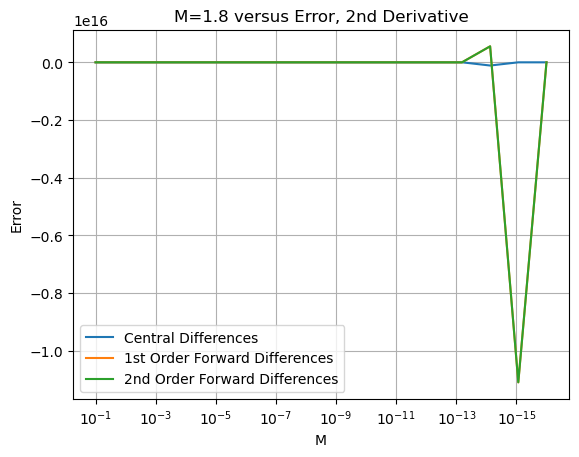

In [1615]:
deltaMvals = np.logspace(-1,-16,num=17)
names = np.array([])
plt.plot(deltaMvals,cd182,'-')
plt.plot(deltaMvals,f1182,'-')
plt.plot(deltaMvals,f2182,'-')
plt.gca().invert_xaxis()
plt.xscale("log")
plt.xlabel('M')
plt.ylabel('Error')
plt.title('M=1.8 versus Error, 2nd Derivative')
plt.legend(['Central Differences','1st Order Forward Differences','2nd Order Forward Differences'])
plt.grid()
plt.show()

I don't think this is the correct value, however with the amount of time I have spent tweaking things, I don't know if I can get it any better. Using what I have, It appears that actually having larger ΔM values results in greater accuracy. With this, this is only with one function, and testing across multiple functions would be needed to ensure true accuracy.